# TAREA 1 - Estadística Multivariada POS 2024-2

## Análisis de Componentes Principales (ACP) y Análisis Factorial (AF)

In [26]:
# Importar las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

### 0. Pre-procesamiento de los datos

In [27]:
# Cargar el dataset
df = pd.read_csv('world-happiness-report-2021.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [28]:
# Renoimbrar las columnas como A1, A2, A3, ..., AN
df.columns = ['A'+str(i) for i in range(1, len(df.columns)+1)]
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


Se renombran las columnas para visualizar mejor las tablas y los graficos, el mapeo de las variables es el siguiente:

- Country name:                                 A1
- Regional indicator:                           A2
- Ladder score:                                 A3
- Standard error of ladder score:               A4
- upperwhisker:                                 A5
- lowerwhisker:                                 A6
- Logged GDP per capita:                        A7
- Social support:                               A8
- Healthy life expectancy:                      A9
- Freedom to make life choices:                 A10
- Generosity:                                   A11
- Perceptions of corruption:                    A12
- Ladder score in Dystopia:                     A13
- Explained by: Log GDP per capita:             A14
- Explained by: Social support:                 A15
- Explained by: Healthy life expectancy:        A16
- Explained by: Freedom to make life choices:   A17
- Explained by: Generosity:                     A18
- Explained by: Perceptions of corruption:      A19
- Dystopia + residual:                          A20

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      149 non-null    object 
 1   A2      149 non-null    object 
 2   A3      149 non-null    float64
 3   A4      149 non-null    float64
 4   A5      149 non-null    float64
 5   A6      149 non-null    float64
 6   A7      149 non-null    float64
 7   A8      149 non-null    float64
 8   A9      149 non-null    float64
 9   A10     149 non-null    float64
 10  A11     149 non-null    float64
 11  A12     149 non-null    float64
 12  A13     149 non-null    float64
 13  A14     149 non-null    float64
 14  A15     149 non-null    float64
 15  A16     149 non-null    float64
 16  A17     149 non-null    float64
 17  A18     149 non-null    float64
 18  A19     149 non-null    float64
 19  A20     149 non-null    float64
dtypes: float64(18), object(2)
memory usage: 23.4+ KB


In [30]:
# Remover observaciones con campos vacios
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      149 non-null    object 
 1   A2      149 non-null    object 
 2   A3      149 non-null    float64
 3   A4      149 non-null    float64
 4   A5      149 non-null    float64
 5   A6      149 non-null    float64
 6   A7      149 non-null    float64
 7   A8      149 non-null    float64
 8   A9      149 non-null    float64
 9   A10     149 non-null    float64
 10  A11     149 non-null    float64
 11  A12     149 non-null    float64
 12  A13     149 non-null    float64
 13  A14     149 non-null    float64
 14  A15     149 non-null    float64
 15  A16     149 non-null    float64
 16  A17     149 non-null    float64
 17  A18     149 non-null    float64
 18  A19     149 non-null    float64
 19  A20     149 non-null    float64
dtypes: float64(18), object(2)
memory usage: 23.4+ KB


Realmente, no habian campos con valores NULL, pero se debe verificar siempre esto.

In [31]:
# Remover variables que no se utilizaran
df = df.drop(['A1', 'A2', 'A13'], axis=1)
df.head()

,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A14,A15,A16,A17,A18,A19,A20
0,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,1.501,1.079,0.753,0.647,0.302,0.384,2.798


Las variables tipo $Object$ ($A1$, $A2$) son removidasya que no sirven en este tipo de análisis por no ser cuentitativas.

De la misma forma, la variable $A13$ también se elimina ya que todos sus valores son idénticos.

In [32]:
# Redondear la base de datos con 3 decimales
df = df.round(5)
df.head()

,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A14,A15,A16,A17,A18,A19,A20
0,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,1.501,1.079,0.753,0.647,0.302,0.384,2.798


## 1. Matrices de Varianza-Covarianza y de Correlación

In [33]:
# Calculo de matrices de varianza-covarianza
cov_matrix = df.cov()
cov_matrix

,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A14,A15,A16,A17,A18,A19,A20
A3,1.153312,-0.011124,1.131530,1.175107,0.982658,0.093386,5.577875,0.073969,-0.002880,-0.081059,0.343270,0.210416,0.175724,0.090003,-0.001861,0.051731,0.284082
A4,-0.011124,0.000484,-0.010174,-0.012072,-0.016462,-0.001342,-0.086854,-0.000686,0.000459,0.001092,-0.005750,-0.003024,-0.002736,-0.000835,0.000300,-0.000697,0.001619
A5,1.131530,-0.010174,1.111611,1.151465,0.950358,0.090753,5.407347,0.072625,-0.002004,-0.078904,0.331987,0.204480,0.170352,0.088367,-0.001288,0.050355,0.287327
A6,1.175107,-0.012072,1.151465,1.198760,1.014903,0.096015,5.747904,0.075312,-0.003760,-0.083197,0.354534,0.216341,0.181080,0.091637,-0.002436,0.053095,0.280909
A7,0.982658,-0.016462,0.950358,1.014903,1.342357,0.104532,6.733455,0.056767,-0.034786,-0.071087,0.468932,0.235496,0.212125,0.069077,-0.022718,0.045359,-0.025614
A8,0.093386,-0.001342,0.090753,0.096015,0.104532,0.013199,0.561887,0.006288,-0.001990,-0.004184,0.036516,0.029741,0.017701,0.007650,-0.001297,0.002672,0.000413
A9,5.577875,-0.086854,5.407347,5.747904,6.733455,0.561887,45.725227,0.353668,-0.164783,-0.441597,2.352192,1.265881,1.440443,0.430292,-0.107495,0.281837,-0.085192
A10,0.073969,-0.000686,0.072625,0.075312,0.056767,0.006288,0.353668,0.012844,0.002893,-0.008153,0.019832,0.014172,0.011140,0.015627,0.001889,0.005202,0.006108
A11,-0.002880,0.000459,-0.002004,-0.003760,-0.034786,-0.001990,-0.164783,0.002893,0.022697,-0.004427,-0.012148,-0.004482,-0.005195,0.003516,0.014805,0.002824,-0.002204
A12,-0.081059,0.001092,-0.078904,-0.083197,-0.071087,-0.004184,-0.441597,-0.008153,-0.004427,0.032122,-0.024831,-0.009438,-0.013909,-0.009912,-0.002891,-0.020496,0.000432


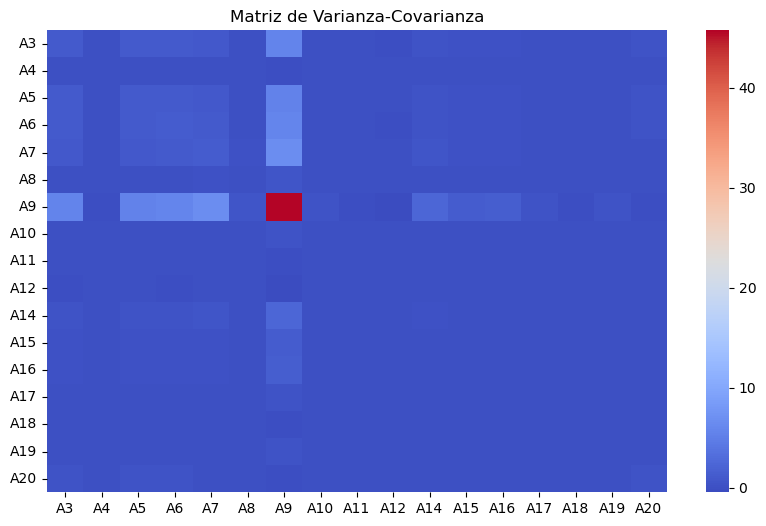

In [34]:
# Grafico de matriz de varianza-covarianza
plt.figure(figsize=(10, 6))
sns.heatmap(cov_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Varianza-Covarianza')
plt.show()

In [35]:
resultados_normalidad = {}
for columna in df.columns:
    stat, p_value = shapiro(df[columna])
    resultados_normalidad[columna] = {'statistic': stat, 'p-value': p_value, 'normal': p_value > 0.05}

# Mostrar los resultados
resultados_normalidad_df = pd.DataFrame(resultados_normalidad).T
print(resultados_normalidad_df)

    statistic   p-value normal
A3   0.991254  0.489341   True
A4   0.865252       0.0  False
A5   0.991429  0.507681   True
A6   0.991006  0.464144   True
A7    0.96503  0.000769  False
A8   0.924522       0.0  False
A9   0.955274  0.000098  False
A10  0.954542  0.000084  False
A11  0.943027   0.00001  False
A12  0.840721       0.0  False
A14  0.965015  0.000766  False
A15  0.924537       0.0  False
A16  0.955291  0.000098  False
A17  0.954424  0.000082  False
A18  0.943033   0.00001  False
A19  0.840684       0.0  False
A20  0.976024  0.010386  False


El test de normalidad indica que este conjunto de datos no sigue una distribución normal.

Se debe aplicar el metodo de $Spearman$ en la correlación por este motivo.

In [36]:
# Calculo de la matriz de correlacion
cor_matrix = df.corr(method='spearman').abs()
cor_matrix

,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A14,A15,A16,A17,A18,A19,A20
A3,1.000000,0.556192,0.999085,0.999195,0.809407,0.797993,0.796862,0.607086,0.007643,0.300833,0.809452,0.798312,0.796232,0.607523,0.008093,0.301221,0.464768
A4,0.556192,1.000000,0.530373,0.578605,0.684887,0.627389,0.629481,0.352505,0.065613,0.264597,0.684849,0.627414,0.630050,0.351512,0.066594,0.264660,0.118871
A5,0.999085,0.530373,1.000000,0.997091,0.796832,0.787911,0.787240,0.607379,0.004229,0.301675,0.796873,0.788240,0.786590,0.607858,0.004607,0.302072,0.483857
A6,0.999195,0.578605,0.997091,1.000000,0.820330,0.804998,0.805030,0.608695,0.012012,0.301106,0.820383,0.805320,0.804424,0.609082,0.012495,0.301504,0.447270
A7,0.809407,0.684887,0.796832,0.820330,1.000000,0.793411,0.871512,0.435200,0.153142,0.276924,0.999989,0.793609,0.871361,0.435051,0.154383,0.277467,0.011116
A8,0.797993,0.627389,0.787911,0.804998,0.793411,1.000000,0.734740,0.488423,0.089402,0.154258,0.793537,0.999968,0.734609,0.488028,0.090206,0.155043,0.060277
A9,0.796862,0.629481,0.787240,0.805030,0.871512,0.734740,1.000000,0.453594,0.138275,0.260539,0.871679,0.735079,0.999977,0.453620,0.139045,0.260652,0.035528
A10,0.607086,0.352505,0.607379,0.608695,0.435200,0.488423,0.453594,1.000000,0.204351,0.347540,0.435934,0.488294,0.452979,0.999979,0.204381,0.346892,0.118610
A11,0.007643,0.065613,0.004229,0.012012,0.153142,0.089402,0.138275,0.204351,1.000000,0.161926,0.152353,0.088864,0.138686,0.204158,0.999976,0.160657,0.070947
A12,0.300833,0.264597,0.301675,0.301106,0.276924,0.154258,0.260539,0.347540,0.161926,1.000000,0.277121,0.154716,0.260279,0.347821,0.162131,0.999978,0.062664


La correlación se saca en valor absoluto para ver en la figura siguiente, correspondiente a un mapa de calor de la matriz de correlación, solo valores entre 0.0 y 1.0 para ver mas fácil las variables que estan fuertemente correlacionadas entre si, negativa o positivamente.

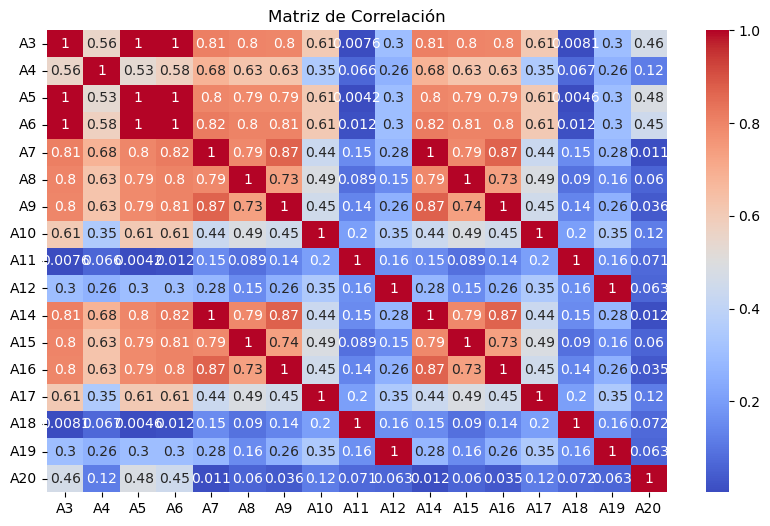

In [37]:
# Grafico de matriz de correlacion
plt.figure(figsize=(10, 6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [38]:
# Remover variables con baja correlacion
df = df.drop(['A11', 'A12', 'A18', 'A19', 'A20'], axis=1)
df.head()

,A3,A4,A5,A6,A7,A8,A9,A10,A14,A15,A16,A17
0,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,1.446,1.106,0.741,0.691
1,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,1.502,1.108,0.763,0.686
2,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,1.566,1.079,0.816,0.653
3,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,1.482,1.172,0.772,0.698
4,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,1.501,1.079,0.753,0.647


Las variables amteriores se eliminaron del análisis ya que no aportan al analisis por tener una baja correlación.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A3      149 non-null    float64
 1   A4      149 non-null    float64
 2   A5      149 non-null    float64
 3   A6      149 non-null    float64
 4   A7      149 non-null    float64
 5   A8      149 non-null    float64
 6   A9      149 non-null    float64
 7   A10     149 non-null    float64
 8   A14     149 non-null    float64
 9   A15     149 non-null    float64
 10  A16     149 non-null    float64
 11  A17     149 non-null    float64
dtypes: float64(12)
memory usage: 14.1 KB


#### El análisis de la matriz de correlación muestra que en general, las variables tienen una buena correlación entre sí, por lo que es viable hacer un análisis de componentes principales en este caso. Sin embargo, hay que descartar del análisis, no del conjunto de datos ni del análisis inferencial posterior, las variables que tuvieron poca correlación con las demás.

## 2. Análisis de componentes principales

In [40]:
# Escalar los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datos_scaled = scaler.fit_transform(df)

In [41]:
# Calcular el PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(datos_scaled)

array([[-5.00329440e+00, -8.55255671e-01,  4.01748755e-01, ...,
        -4.00123340e-04, -2.14803510e-04, -1.58861678e-05],
       [-4.91480199e+00, -7.00816932e-01,  2.71588979e-01, ...,
        -1.49979726e-03,  8.18499424e-04, -2.99358125e-04],
       [-4.94343515e+00, -2.76251313e-01,  2.99755553e-01, ...,
         6.89609101e-05,  4.45774041e-04,  2.92599008e-04],
       ...,
       [ 4.18564391e+00, -1.95992893e+00, -2.30301721e+00, ...,
        -2.54234147e-04,  4.87961014e-04,  1.28371138e-04],
       [ 4.48810374e+00,  7.36565321e-01, -1.35919907e+00, ...,
         2.47677588e-04, -1.96726227e-05, -3.40165812e-04],
       [ 7.96412020e+00,  3.56158801e+00, -1.51612527e+00, ...,
        -1.69643209e-03, -5.41392050e-04, -3.07865827e-04]])

### 2.1. Valores y Vectores Propios PCA y Varianza Explicada

In [42]:
# Obtener tablas de componentes principales y eigenvalores
eigenvalues = pca.explained_variance_
percentage_var = pca.explained_variance_ratio_
acum_percentage_var = np.cumsum(percentage_var)

# Crear tabla de componentes principales
components = range(1, len(eigenvalues) + 1)
components_table = pd.DataFrame({'Eigenvalue': eigenvalues, 'Explained Variance': percentage_var, 'Cumulative Explained Variance': acum_percentage_var})
components_table

,Eigenvalue,Explained Variance,Cumulative Explained Variance
0,8.697034e+00,7.198887e-01,0.719889
1,1.439948e+00,1.191903e-01,0.839079
2,6.902661e-01,5.713612e-02,0.896215
3,5.736163e-01,4.748054e-02,0.943696
4,4.364422e-01,3.612608e-02,0.979822
5,2.437628e-01,2.017723e-02,0.999999
6,5.911831e-06,4.893462e-07,1.000000
7,4.042875e-06,3.346451e-07,1.000000
8,8.402782e-07,6.955323e-08,1.000000
9,6.529228e-07,5.404506e-08,1.000000


De la tabla anterior se puede deducir que para representar al menos el 70% de la variabilidad total de los datos es suficiente con un solo componente principal.

La varianza explicada de cada componente es proporcional al valor propio obtenido. Si el valor propio es grande entonces la varianza explicada también loes en proporción.

In [43]:
def screen_plot(components_table):
    percentages = components_table['Explained Variance']
    acumulados = components_table['Cumulative Explained Variance']

    # Gráfico de Scree Plot
    plt.figure(figsize=(8, 5))
    plt.bar(np.arange(1, len(percentages) + 1), acumulados * 100, color="red", zorder=2, alpha=0.7, label='Acumulado')
    plt.bar(np.arange(1, len(percentages) + 1), percentages * 100, color="blue", zorder=3, alpha=0.7, label='Porcentaje')
    plt.title('Scree Plot')
    plt.xlabel('Número de Componentes')
    plt.ylabel('Porcentaje de Varianza Explicada [%]')
    plt.xlim(0, len(percentages) + 1)
    plt.ylim(0, 100)
    plt.xticks(np.arange(1, len(percentages) + 1))
    plt.yticks(np.arange(0, 101, 10))
    plt.grid(axis='y', linestyle='--', zorder=0)
    plt.legend()
    plt.show()

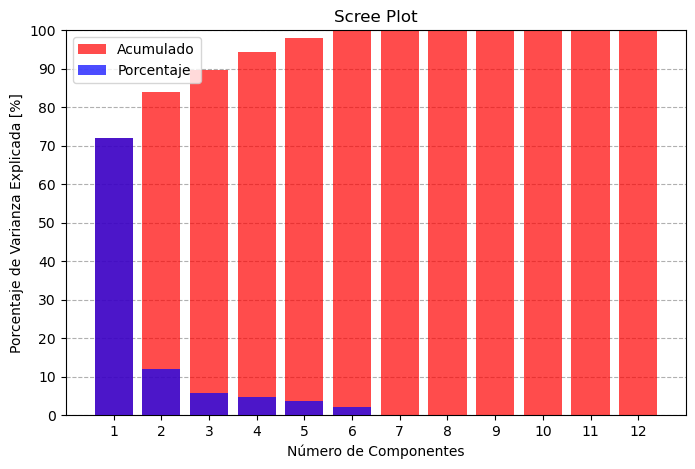

In [44]:
screen_plot(components_table)

In [45]:
# Obtener las cargas factoriales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_table = pd.DataFrame(loadings, columns=[f"PC{i}" for i in range(1, len(loadings) + 1)], index=df.columns)
loadings_table.abs()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
A3,0.931082,0.110613,0.272207,0.110798,0.200420,0.032655,0.000009,0.000005,0.000036,0.000042,5.357730e-06,2.112656e-04
A4,0.633661,0.331746,0.575798,0.036062,0.389190,0.104218,0.000003,0.000005,0.000030,0.000037,7.566248e-07,8.479822e-07
A5,0.922453,0.126279,0.300863,0.114350,0.188297,0.028990,0.000041,0.000061,0.000387,0.000474,1.165032e-05,9.335037e-05
A6,0.938203,0.095432,0.244338,0.107243,0.211939,0.036124,0.000033,0.000068,0.000365,0.000449,6.612561e-06,1.184267e-04
A7,0.918906,0.264655,0.060909,0.059411,0.059291,0.285606,0.000044,0.000030,0.000011,0.000025,3.712020e-04,1.903495e-06
A8,0.877118,0.108567,0.083001,0.456513,0.082813,0.058997,0.000068,0.001416,0.000017,0.000043,8.970834e-06,1.197952e-06
A9,0.898511,0.204592,0.074049,0.235678,0.260282,0.169711,0.000098,0.000097,0.000525,0.000330,1.378144e-05,3.662541e-07
A10,0.653968,0.722934,0.226172,0.013923,0.064274,0.031083,0.001714,0.000051,0.000039,0.000010,1.059491e-05,5.822043e-07
A14,0.918898,0.264621,0.060926,0.059409,0.059318,0.285654,0.000045,0.000031,0.000011,0.000025,3.711523e-04,1.901311e-06
A15,0.877099,0.108401,0.082767,0.456653,0.082550,0.059188,0.000068,0.001416,0.000017,0.000043,8.959359e-06,1.202012e-06


De la tabla correspondiente a las cargas factoriales, se puede deducir entonces que los componentes principales que se tomen, por ejemplo, 2 componentes para tener un grafico en dos dimensiones que represente el ~84% de la variabilidad total de los datos, las posibles combinaciones lineales para esos dos componentes son:

- $PC1=A3\times 0.931464+A4\times 0.618116+A5\times 0.922926+A6\times 0.938475+A7\times 0.918734+A8\times 0.875986+A9\times 0.898425+A14\times 0.918434+A15\times 0.877808+A16\times 0.897661$

- $PC2=A10\times 0.724992+A17\times 0.722093$

### 2.2. Gráfico Biplot 

In [46]:
def plot_biplot(res_pca, loadings, datos, a=1.0):
    # Biplot de PCA
    sns.scatterplot(x=res_pca[:, 0], y=res_pca[:, 1], alpha=0.8, color='b')
    for i, columna in enumerate(datos.columns):
        plt.arrow(0, 0, a*loadings[i, 0], a*loadings[i, 1], color='r', alpha=0.5)
        plt.text(loadings[i, 0]*(a + 0.15), loadings[i, 1]*(a + 0.15), columna, color='g', ha='center', va='center')
    plt.grid()
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Biplot')
    plt.show()

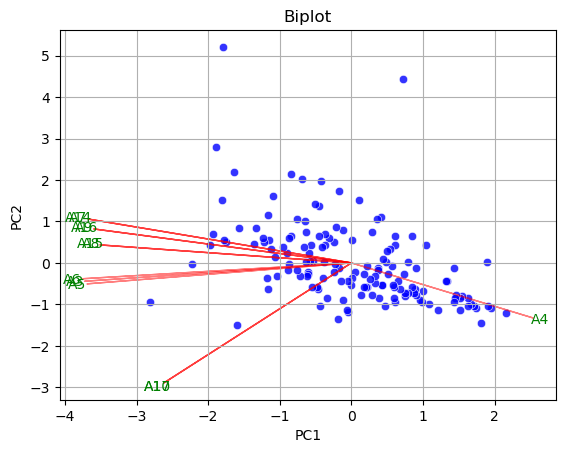

In [47]:
plot_biplot(datos_scaled, loadings, df, a=4)

Los componentes principales definidos anteriormente se pueden ver en la figura del biplot, donde hay algunos vectores muy juntos que indican una fuerte correlacion positiva, y uno de ellos que es el vector de $Standard \_ error \_ of \_ ladder \_ score$ que tiene una fuerte correlación pero negativa.

Por otro lado, hay dos vectores que tienen un angulo diferente a "cercano a 0°" o "cercano a 180°" con respecto a los demás, lo que hace que estos estén en un compoennte distinto ya que no tienen fuerte correlación con los demás.

## 5. Análisis Factorial

In [48]:
import pingouin as pg
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [49]:
normalidad = pg.multivariate_normality(datos_scaled, alpha=0.05)
normalidad

HZResults(hz=1.0342478868599325, pval=2.970835037286544e-12, normal=False)

Como no es normal, usar MLE no funciona en este caso.

In [50]:
resultados_normalidad = {}
for columna in range(datos_scaled.shape[1]):
    stat, p_value = shapiro(datos_scaled[:, columna])
    resultados_normalidad[df.columns[columna]] = {'statistic': stat, 'p-value': p_value, 'normal': p_value > 0.05}

# Mostrar los resultados
resultados_normalidad_df = pd.DataFrame(resultados_normalidad).T
print(resultados_normalidad_df)

    statistic   p-value normal
A3   0.991254  0.489341   True
A4   0.865252       0.0  False
A5   0.991429  0.507681   True
A6   0.991006  0.464144   True
A7    0.96503  0.000769  False
A8   0.924522       0.0  False
A9   0.955274  0.000098  False
A10  0.954542  0.000084  False
A14  0.965015  0.000766  False
A15  0.924537       0.0  False
A16  0.955291  0.000098  False
A17  0.954424  0.000082  False


In [51]:
# Hacer test de espericidad de Bartlett
chi_square_value, p_value = calculate_bartlett_sphericity(datos_scaled)
chi_square_value, p_value

(12172.408486254935, 0.0)

De esta forma, se pueden aplicar modelos de ordenación ya que el valor $p$ es 0.0

In [52]:
# Aplicar criterio de Kaiser-Meyer-Olkin
kmo_all, kmo_model = calculate_kmo(datos_scaled)

for i in range(0, len(kmo_all)):
    print(f'{df.columns[i]} es {kmo_all[i]}')

print(f'KMO total es {kmo_model}')

A3 es 0.8052534902488114
A4 es 0.8403483520897804
A5 es 0.8434983837117531
A6 es 0.8192680828618216
A7 es 0.8589601983207014
A8 es 0.8420572520877222
A9 es 0.8465844288477753
A10 es 0.7625745650656492
A14 es 0.8589697869775584
A15 es 0.8420574710931438
A16 es 0.8465872195822091
A17 es 0.7625751045219946
KMO total es 0.830912930221354


c:\Users\kevin\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Como el KMO total es superior a 0.6, en realidad, es 0.83, es muy buen candidato para hacer un análisis factorial.

In [53]:
# Determinar el número de factores
fa_minres = FactorAnalyzer(n_factors=3, rotation=None, method='minres', is_corr_matrix=False)
fa_minres.fit(datos_scaled)
# Obtener los eigenvalues
eigenvalues, vectors = fa_minres.get_eigenvalues()
eigenvalues

array([8.63866491e+00, 1.43028354e+00, 6.85633486e-01, 5.69766527e-01,
       4.33513016e-01, 2.42126805e-01, 5.87215445e-06, 4.01574174e-06,
       8.34638762e-07, 6.48540764e-07, 2.74663013e-07, 6.69318792e-08])

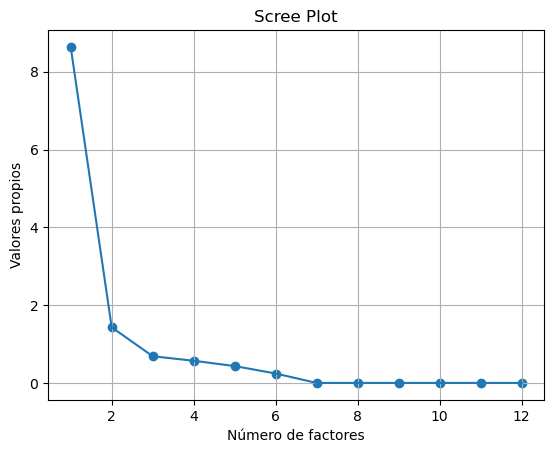

In [54]:
# Hacer grafico de sedimentación
plt.scatter(range(1, df.shape[1]+1), eigenvalues)
plt.plot(range(1, df.shape[1]+1), eigenvalues)
plt.title('Scree Plot')
plt.xlabel('Número de factores')
plt.ylabel('Valores propios')
plt.grid()
plt.show()

In [55]:
fa_mle = FactorAnalyzer(n_factors=3, rotation=None, method='mle', is_corr_matrix=False)
fa_mle.fit(datos_scaled)
# Obtener los eigenvalues
eigenvalues, vectors = fa_mle.get_eigenvalues()
eigenvalues

array([8.63866491e+00, 1.43028354e+00, 6.85633486e-01, 5.69766527e-01,
       4.33513016e-01, 2.42126805e-01, 5.87215445e-06, 4.01574174e-06,
       8.34638762e-07, 6.48540764e-07, 2.74663013e-07, 6.69318792e-08])

In [56]:
comunalidades_mle = fa_mle.get_communalities()
comunalidades_minres = fa_minres.get_communalities()

comunalidades = pd.DataFrame({'Minres': comunalidades_minres, 'MLE': comunalidades_mle})
comunalidades.index = df.columns
comunalidades = comunalidades.sort_values('Minres', ascending=False)
comunalidades

,Minres,MLE
A5,0.998729,0.720898
A10,0.997062,0.991223
A17,0.997052,0.991234
A3,0.995948,0.735882
A6,0.988673,0.748708
A7,0.928583,0.993526
A14,0.928544,0.993524
A16,0.847125,0.997495
A9,0.847080,0.997494
A8,0.740399,0.651599


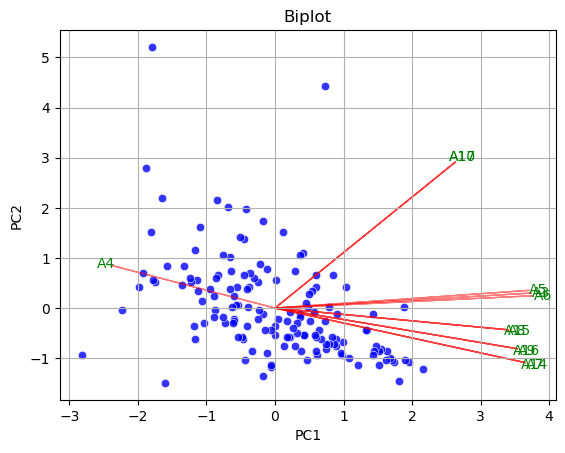

In [57]:
plot_biplot(datos_scaled, fa_minres.loadings_, df, a=4)